# Assignment 3

The assignment 3 contains 1 question and the due date is April 28th (Sunday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 How Yelp Uses Deep Learning to Classify Business Photos? (100 points)

Yelp hosts tens of millions of photos uploaded by Yelpers from all around the world. The wide variety of these photos provides a rich window into local businesses, a window we’re only just peeking through today.

One way we’re trying to open that window is by developing a photo understanding system which allows us to create semantic data about individual photographs. The data generated by the system has been powering our recent launch of tabbed photo browsing as well as our first attempts at content-based photo diversification.

You can check more details about Yelp's practices at [here](https://engineeringblog.yelp.com/2015/10/how-we-use-deep-learning-to-classify-business-photos-at-yelp.html)


![food](https://engineeringblog.yelp.com/images/posts/2015-10-14-photo-classification/image02.png)


In this question, you will be asked to building a Photo Classifier.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Let's first upload the file images.npy and labels.npy and load the images dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
images = np.load('/content/drive/MyDrive/Ordnung/Nova/Cources/2. Semester/T4/ML part 2/Assignment1/images.npy') # SHAPE: (1024, 256, 256, 3) -> (N_SAMPLES, HEIGHT, WIDTH, CHANNELS)
labels = np.load('/content/drive/MyDrive/Ordnung/Nova/Cources/2. Semester/T4/ML part 2/Assignment1/labels.npy') # SHAPE: (1024,) -> (N_SAMPLES,). Label encoded: 0, 1, 2, 3

print('Images shape:', images.shape)
print('Labels shape:', labels.shape)
print('Labels match the image at the respective 0 to 1024 position.')

Images shape: (1024, 256, 256, 3)
Labels shape: (1024,)
Labels match the image at the respective 0 to 1024 position.


There are four types of the images on Yelp: Food, Drink, Interior and Exterior

In [5]:
np.unique(labels)

array([0, 1, 2, 3])

We visualize some random images from the dataset below:

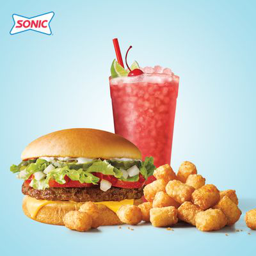

In [ ]:
# food: class 0

Image.fromarray(images[5])

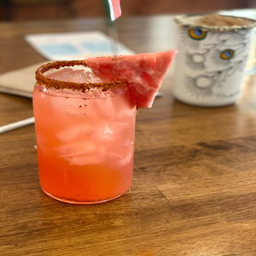

In [ ]:
# drink: class 1

Image.fromarray(images[3])

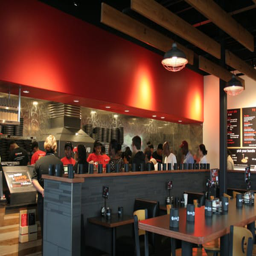

In [ ]:
# interior: class 2

Image.fromarray(images[7])

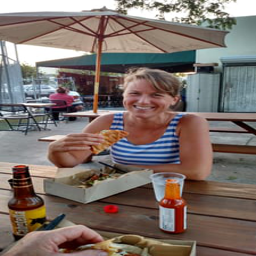

In [ ]:
# exterior: class 3

Image.fromarray(images[8])

### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the Yelp image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Donot forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

In [44]:
# Perform the train-test split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

import tensorflow as tf
from tensorflow.keras import layers, models

keras.backend.clear_session()
np.random.seed(11)
tf.random.set_seed(11)

# Define the input shape (assuming images are preprocessed to 256x256 pixels with 3 color channels)
input_shape = (256, 256, 3)

model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))

# Adding 20 hidden layers with 100 neurons each, using ReLU activation
for _ in range(20):
    model.add(layers.Dense(100, activation='relu'))

# Add the output layer (assuming a multi-class classification problem, e.g., 5 classes)
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 100)               19660900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [45]:
# X_train, y_train, X_test, y_test are already defined
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test))


Epoch 1/100
26/26 [==============================] - 7s 52ms/step - loss: 1.4522 - accuracy: 0.2332 - val_loss: 1.3928 - val_accuracy: 0.2439
Epoch 2/100
26/26 [==============================] - 1s 23ms/step - loss: 1.3877 - accuracy: 0.2650 - val_loss: 1.3699 - val_accuracy: 0.2634
Epoch 3/100
26/26 [==============================] - 1s 23ms/step - loss: 1.3686 - accuracy: 0.3040 - val_loss: 1.4040 - val_accuracy: 0.2585
Epoch 4/100
26/26 [==============================] - 1s 23ms/step - loss: 1.3978 - accuracy: 0.2650 - val_loss: 1.3930 - val_accuracy: 0.2732
Epoch 5/100
26/26 [==============================] - 1s 24ms/step - loss: 1.3477 - accuracy: 0.3370 - val_loss: 1.3030 - val_accuracy: 0.2927
Epoch 6/100
26/26 [==============================] - 1s 24ms/step - loss: 1.3275 - accuracy: 0.3443 - val_loss: 1.3388 - val_accuracy: 0.3171
Epoch 7/100
26/26 [==============================] - 1s 24ms/step - loss: 1.2412 - accuracy: 0.4200 - val_loss: 1.2813 - val_accuracy: 0.4439
Epoch 

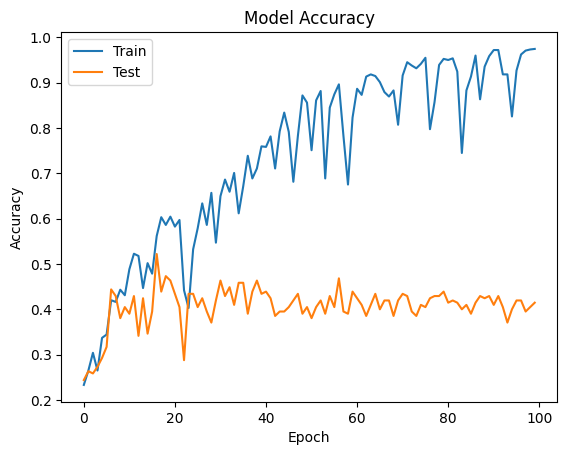

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

7/7 [==============================] - 0s 10ms/step - loss: 3.4175 - accuracy: 0.4146
Test Accuracy: 0.41


In this neural network we get an input of the size of 196608 neurons, which are densly connected to the first hiddenlayer with 100 neurons. So thanks to the connections we already have 1960800 parameters and 100 for the biases of the first hidden layers. Afer that there are 19 more hidden layers with 100 neurons following. Between each layer we have 10000 connection  and for each layer we have 100 biases. For the output layer we have 5 biases. So we have 500 parameters from the connection and 5 because of the biases of the output layer. All together this makes 19853305 trainable parameters.
This for it self are a lot of parameters in a lot of layers which create a likelyhood of being overfitting. In the graph above we can see the accuracy for the training data increacing while the test data seems to be slightly decreasing with each additional number of epoch. This is an indicator for overfitting. Additionally the accuracy for the test data is getting more than twice as high as the test data accuracy. This is an indicator, that the reason of overfitting is not manly the epochs but rather the too high complexity of the model and the too high number of parameters.

### Question 1.2 (25 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture.

In [48]:
#Model with Batchnormalization and early stopping
model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))

# Adding 20 hidden layers with 100 neurons each, using ReLU activation
for _ in range(20):
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())

# Add the output layer (assuming a multi-class classification problem, e.g., 5 classes)
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# X_train, y_train, X_test, y_test are already defined and preprocessed
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test))  # Include the callback here


Epoch 1/100
26/26 [==============================] - 13s 74ms/step - loss: 2.0731 - accuracy: 0.2125 - val_loss: 1.5482 - val_accuracy: 0.2439
Epoch 2/100
26/26 [==============================] - 1s 35ms/step - loss: 1.7946 - accuracy: 0.2662 - val_loss: 1.5270 - val_accuracy: 0.2878
Epoch 3/100
26/26 [==============================] - 1s 35ms/step - loss: 1.7094 - accuracy: 0.2796 - val_loss: 1.5041 - val_accuracy: 0.2878
Epoch 4/100
26/26 [==============================] - 1s 35ms/step - loss: 1.6311 - accuracy: 0.2747 - val_loss: 1.4862 - val_accuracy: 0.2878
Epoch 5/100
26/26 [==============================] - 1s 36ms/step - loss: 1.5504 - accuracy: 0.3321 - val_loss: 1.4914 - val_accuracy: 0.2537
Epoch 6/100
26/26 [==============================] - 1s 37ms/step - loss: 1.5386 - accuracy: 0.3358 - val_loss: 1.4812 - val_accuracy: 0.3024
Epoch 7/100
26/26 [==============================] - 1s 35ms/step - loss: 1.4933 - accuracy: 0.3541 - val_loss: 1.4685 - val_accuracy: 0.2878
Epoch

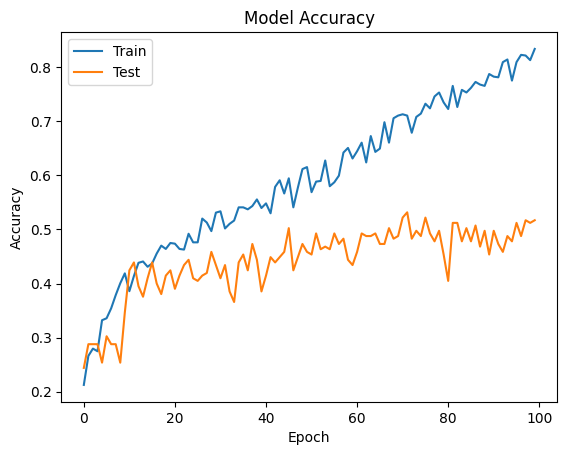

In [52]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [53]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

7/7 [==============================] - 0s 13ms/step - loss: 1.8897 - accuracy: 0.4585
Test Accuracy: 0.46


In [54]:
# Define the EarlyStopping callback to prevent overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust based on the performance and training time
    validation_data=(X_test, y_test),
    callbacks=[early_stopping_cb]
    )

Epoch 1/100
26/26 [==============================] - 1s 44ms/step - loss: 0.3220 - accuracy: 0.8840 - val_loss: 2.1559 - val_accuracy: 0.4732
Epoch 2/100
26/26 [==============================] - 1s 35ms/step - loss: 0.3596 - accuracy: 0.8706 - val_loss: 2.0562 - val_accuracy: 0.4683
Epoch 3/100
26/26 [==============================] - 1s 34ms/step - loss: 0.3988 - accuracy: 0.8523 - val_loss: 2.5333 - val_accuracy: 0.4341
Epoch 4/100
26/26 [==============================] - 1s 40ms/step - loss: 0.3961 - accuracy: 0.8510 - val_loss: 1.9252 - val_accuracy: 0.5220
Epoch 5/100
26/26 [==============================] - 1s 39ms/step - loss: 0.3180 - accuracy: 0.8828 - val_loss: 1.8868 - val_accuracy: 0.5463
Epoch 6/100
26/26 [==============================] - 1s 35ms/step - loss: 0.3040 - accuracy: 0.9035 - val_loss: 2.0596 - val_accuracy: 0.4927
Epoch 7/100
26/26 [==============================] - 1s 35ms/step - loss: 0.3058 - accuracy: 0.8950 - val_loss: 2.8134 - val_accuracy: 0.4000
Epoch 

In [55]:
# Evaluate the model on the test set
print(f"Test Accuracy: {max(history.history['val_accuracy'])}")

Test Accuracy: 0.5463414788246155


In [57]:
#Model with Batchnormalization and early stopping
model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))

# Adding 20 hidden layers with 100 neurons each, using ReLU activation
for _ in range(20):
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2)) #0.2 just assumed

# Add the output layer (assuming a multi-class classification problem, e.g., 5 classes)
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback to prevent overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust based on the performance and training time
    validation_data=(X_test, y_test),
    callbacks=[early_stopping_cb]
    )

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Accuracy: {max(history.history['val_accuracy'])}")

Epoch 1/100
26/26 [==============================] - 15s 85ms/step - loss: 2.2497 - accuracy: 0.1929 - val_loss: 1.5658 - val_accuracy: 0.2780
Epoch 2/100
26/26 [==============================] - 1s 36ms/step - loss: 2.0629 - accuracy: 0.2210 - val_loss: 1.5358 - val_accuracy: 0.2732
Epoch 3/100
26/26 [==============================] - 1s 36ms/step - loss: 1.9393 - accuracy: 0.2137 - val_loss: 1.5177 - val_accuracy: 0.2244
Epoch 4/100
26/26 [==============================] - 1s 37ms/step - loss: 1.9065 - accuracy: 0.2161 - val_loss: 1.5184 - val_accuracy: 0.2195
Epoch 5/100
26/26 [==============================] - 1s 36ms/step - loss: 1.8273 - accuracy: 0.2283 - val_loss: 1.5046 - val_accuracy: 0.1854
Epoch 6/100
26/26 [==============================] - 1s 37ms/step - loss: 1.7261 - accuracy: 0.2357 - val_loss: 1.5114 - val_accuracy: 0.1854
Epoch 7/100
26/26 [==============================] - 1s 37ms/step - loss: 1.6714 - accuracy: 0.2601 - val_loss: 1.5093 - val_accuracy: 0.2098
Epoch

In [63]:
#Model with Batchnormalization and early stopping
model = models.Sequential()
model.add(layers.Flatten(input_shape=input_shape))

# Adding 20 hidden layers with 100 neurons each, using ReLU activation
for _ in range(20):
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.05)) #0.2 just assumed

# Add the output layer (assuming a multi-class classification problem, e.g., 5 classes)
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback to prevent overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust based on the performance and training time
    validation_data=(X_test, y_test),
    callbacks=[early_stopping_cb]
    )

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Accuracy: {max(history.history['val_accuracy'])}")

Epoch 1/100
26/26 [==============================] - 14s 82ms/step - loss: 2.1554 - accuracy: 0.2247 - val_loss: 1.5746 - val_accuracy: 0.2439
Epoch 2/100
26/26 [==============================] - 1s 37ms/step - loss: 1.9058 - accuracy: 0.2210 - val_loss: 1.5402 - val_accuracy: 0.2439
Epoch 3/100
26/26 [==============================] - 1s 38ms/step - loss: 1.8195 - accuracy: 0.2369 - val_loss: 1.5228 - val_accuracy: 0.2439
Epoch 4/100
26/26 [==============================] - 1s 38ms/step - loss: 1.7187 - accuracy: 0.2503 - val_loss: 1.5068 - val_accuracy: 0.2390
Epoch 5/100
26/26 [==============================] - 1s 37ms/step - loss: 1.6792 - accuracy: 0.2515 - val_loss: 1.4772 - val_accuracy: 0.2390
Epoch 6/100
26/26 [==============================] - 1s 41ms/step - loss: 1.6145 - accuracy: 0.2796 - val_loss: 1.4627 - val_accuracy: 0.3220
Epoch 7/100
26/26 [==============================] - 1s 37ms/step - loss: 1.5905 - accuracy: 0.2759 - val_loss: 1.4513 - val_accuracy: 0.2585
Epoch

With the combination of early stopping and the batch normalization I reached an improvement of over 10%.

### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network.

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    # Convolutional layer with 32 filters
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional layer with 128 filters
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((3, 3)),

    # Flatten layer
    layers.Flatten(),

    # Dense layers
    layers.Dense(120, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting

    # Output layer - assuming a multi-class classification with 'n' classes
    layers.Dense(5, activation='softmax')  # Change the number of units to match the number of classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding
    metrics=['accuracy']
)


# Model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 21, 21, 128)      

In [ ]:
# Define the EarlyStopping callback to prevent overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Adjust based on the performance and training time
    validation_data=(X_test, y_test),
    callbacks=[early_stopping_cb]
)



Epoch 1/100
26/26 [==============================] - 12s 176ms/step - loss: 1.4801 - accuracy: 0.3199 - val_loss: 1.2138 - val_accuracy: 0.4927
Epoch 2/100
26/26 [==============================] - 2s 63ms/step - loss: 1.2327 - accuracy: 0.4640 - val_loss: 1.1398 - val_accuracy: 0.5512
Epoch 3/100
26/26 [==============================] - 2s 62ms/step - loss: 1.1239 - accuracy: 0.5238 - val_loss: 1.2279 - val_accuracy: 0.4780
Epoch 4/100
26/26 [==============================] - 2s 62ms/step - loss: 1.0701 - accuracy: 0.5592 - val_loss: 1.1343 - val_accuracy: 0.5561
Epoch 5/100
26/26 [==============================] - 2s 61ms/step - loss: 0.9000 - accuracy: 0.6471 - val_loss: 1.1503 - val_accuracy: 0.5512
Epoch 6/100
26/26 [==============================] - 2s 62ms/step - loss: 0.7097 - accuracy: 0.7326 - val_loss: 1.1291 - val_accuracy: 0.5805
Epoch 7/100
26/26 [==============================] - 2s 62ms/step - loss: 0.4613 - accuracy: 0.8327 - val_loss: 1.1360 - val_accuracy: 0.6341
Epoc

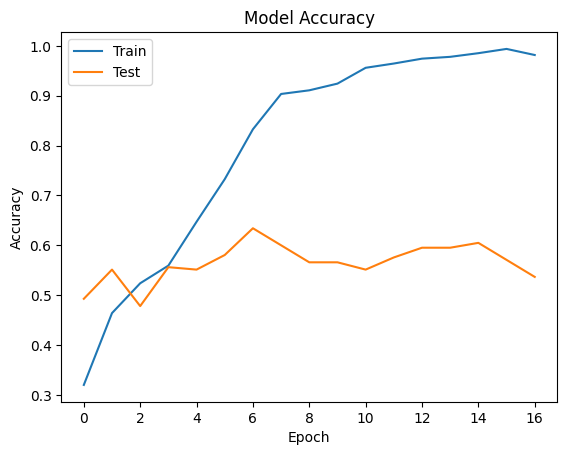

7/7 [==============================] - 0s 25ms/step - loss: 1.1360 - accuracy: 0.6341
Test Accuracy: 0.63


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

With an accuracy of 63% on the test set the CNN outperforms the NN by approximately 10%. The results are fluctuating a lot. Thus we can only say appromimately 10%. But it was apparent, that all the models befor were never exceeding 55% accuracy.

### Question 1.4 Transfer learning (35 points)

In this question, we will use the several well-known architectures that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, these architectures have already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks.

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of model, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained models from `tensorflow.keras.applications`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below:

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures.

Try to use the following models: VGG16, Inception, ResNet, MobileNet and EfficientNet and compare their performance and running time. Explain which model would work the best.

In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models

def VGG16(input_shape, num_classes, X_train, y_train, X_test, y_test):
    """
    Creates and trains a convolutional neural network model based on the VGG16 architecture,
    including an EarlyStopping callback to prevent overfitting.

    Parameters:
    input_shape (tuple): The shape of the input images (height, width, channels).
    num_classes (int): The number of classes for the final output layer.
    X_train (array-like): Training data.
    y_train (array-like): Labels for the training data.
    X_test (array-like): Validation data.
    y_test (array-like): Labels for the validation data.

    Returns:
    model (tf.keras.Model): The trained TensorFlow Keras model.
    history (History): A record of training loss values and metrics values at successive epochs.
    """
    # Load the VGG16 model, pretrained on ImageNet
    base_model = tf.keras.applications.VGG16(
        include_top=False,          # Do not include the fully connected layer at the top of the network
        weights='imagenet',         # Use weights trained on ImageNet
        input_shape=input_shape     # Define the input shape of the images
    )

    # Freeze the layers of the base model to prevent them from being updated during training
    base_model.trainable = False

    # Create a new model on top
    model = models.Sequential([
        base_model,
        layers.Flatten(),  # Flatten the output of the base layers to feed into the dense layers

        # Dense layers
        layers.Dense(120, activation='relu'),
        layers.Dense(60, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer to reduce overfitting

        # Output layer
        layers.Dense(num_classes, activation='softmax')  # Output layer for 'num_classes' classes
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding
        metrics=['accuracy']
    )

    # Define the EarlyStopping callback to prevent overfitting
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # Monitor the validation accuracy
        patience=10,             # Stop after 10 epochs without improvement in validation accuracy
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
    )

    # Fit the model
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Adjust based on the performance and training time
        validation_data=(X_test, y_test),
        callbacks=[early_stopping_cb]
    )

    print(max(history.history['val_accuracy']))

    return model, history

# Example usage:
input_shape = (256, 256, 3)  # Adjust as necessary for your data
num_classes = 5  # Adjust based on the number of classes you are classifying
model, history = VGG16(input_shape, num_classes, X_train, y_train, X_test, y_test)


Epoch 1/100
26/26 [==============================] - 8s 248ms/step - loss: 1.6321 - accuracy: 0.4298 - val_loss: 0.6370 - val_accuracy: 0.7512
Epoch 2/100
26/26 [==============================] - 6s 227ms/step - loss: 0.6747 - accuracy: 0.7350 - val_loss: 0.6036 - val_accuracy: 0.7659
Epoch 3/100
26/26 [==============================] - 6s 232ms/step - loss: 0.4525 - accuracy: 0.8388 - val_loss: 0.6425 - val_accuracy: 0.7756
Epoch 4/100
26/26 [==============================] - 6s 233ms/step - loss: 0.3219 - accuracy: 0.8803 - val_loss: 0.5661 - val_accuracy: 0.7854
Epoch 5/100
26/26 [==============================] - 6s 228ms/step - loss: 0.1844 - accuracy: 0.9426 - val_loss: 0.6047 - val_accuracy: 0.7756
Epoch 6/100
26/26 [==============================] - 6s 225ms/step - loss: 0.1292 - accuracy: 0.9621 - val_loss: 0.5288 - val_accuracy: 0.8195
Epoch 7/100
26/26 [==============================] - 6s 220ms/step - loss: 0.0778 - accuracy: 0.9805 - val_loss: 0.5483 - val_accuracy: 0.8244

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, models

def Inception(input_shape, num_classes, X_train, y_train, X_test, y_test):
    """
    Creates and trains a convolutional neural network model based on the InceptionV3 architecture,
    including an EarlyStopping callback to prevent overfitting.

    Parameters:
    input_shape (tuple): The shape of the input images (height, width, channels).
    num_classes (int): The number of classes for the final output layer.
    X_train (array-like): Training data.
    y_train (array-like): Labels for the training data.
    X_test (array-like): Validation data.
    y_test (array-like): Labels for the validation data.

    Returns:
    model (tf.keras.Model): The trained TensorFlow Keras model.
    history (History): A record of training loss values and metrics values at successive epochs.
    """
    # Load the InceptionV3 model, pretrained on ImageNet
    base_model = tf.keras.applications.InceptionV3(
        include_top=False,          # Do not include the fully connected layer at the top of the network
        weights='imagenet',         # Use weights trained on ImageNet
        input_shape=input_shape     # Define the input shape of the images
    )

    # Freeze the layers of the base model to prevent them from being updated during training
    base_model.trainable = False

    # Create a new model on top
    model = models.Sequential([
        base_model,
        layers.Flatten(),  # Flatten the output of the base layers to feed into the dense layers

        # Dense layers
        layers.Dense(120, activation='relu'),
        layers.Dense(60, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer to reduce overfitting

        # Output layer
        layers.Dense(num_classes, activation='softmax')  # Output layer for 'num_classes' classes
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding
        metrics=['accuracy']
    )

    # Define the EarlyStopping callback to prevent overfitting
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # Monitor the validation accuracy
        patience=10,             # Stop after 10 epochs without improvement in validation accuracy
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
    )

    # Fit the model
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Adjust based on the performance and training time
        validation_data=(X_test, y_test),
        callbacks=[early_stopping_cb]
    )

    print(max(history.history['val_accuracy']))

    return model, history

# Example usage:
input_shape = (256, 256, 3)  # Adjust as necessary for your data
num_classes = 5  # Adjust based on the number of classes you are classifying
model, history = Inception(input_shape, num_classes, X_train, y_train, X_test, y_test)


87910968/87910968 [==============================] - 3s 0us/step
Epoch 1/100
26/26 [==============================] - 18s 389ms/step - loss: 5.2307 - accuracy: 0.5775 - val_loss: 0.8018 - val_accuracy: 0.8927
Epoch 2/100
26/26 [==============================] - 3s 119ms/step - loss: 1.8491 - accuracy: 0.8107 - val_loss: 0.6798 - val_accuracy: 0.8976
Epoch 3/100
26/26 [==============================] - 3s 114ms/step - loss: 0.5408 - accuracy: 0.9206 - val_loss: 0.7139 - val_accuracy: 0.8976
Epoch 4/100
26/26 [==============================] - 3s 121ms/step - loss: 0.3970 - accuracy: 0.9292 - val_loss: 0.6335 - val_accuracy: 0.9024
Epoch 5/100
26/26 [==============================] - 3s 115ms/step - loss: 0.2582 - accuracy: 0.9353 - val_loss: 0.7773 - val_accuracy: 0.8878
Epoch 6/100
26/26 [==============================] - 3s 117ms/step - loss: 0.2654 - accuracy: 0.9402 - val_loss: 0.8565 - val_accuracy: 0.8683
Epoch 7/100
26/26 [==============================] - 3s 117ms/step - loss: 0

In [68]:
import tensorflow as tf
from tensorflow.keras import layers, models

def ResNet(input_shape, num_classes, X_train, y_train, X_test, y_test):
    """
    Creates and trains a convolutional neural network model based on the ResNet50 architecture,
    including an EarlyStopping callback to prevent overfitting.

    Parameters:
    input_shape (tuple): The shape of the input images (height, width, channels).
    num_classes (int): The number of classes for the final output layer.
    X_train (array-like): Training data.
    y_train (array-like): Labels for the training data.
    X_test (array-like): Validation data.
    y_test (array-like): Labels for the validation data.

    Returns:
    model (tf.keras.Model): The trained TensorFlow Keras model.
    history (History): A record of training loss values and metrics values at successive epochs.
    """
    # Load the ResNet50 model, pretrained on ImageNet
    base_model = tf.keras.applications.ResNet50(
        include_top=False,          # Do not include the fully connected layer at the top of the network
        weights='imagenet',         # Use weights trained on ImageNet
        input_shape=input_shape     # Define the input shape of the images
    )

    # Freeze the layers of the base model to prevent them from being updated during training
    base_model.trainable = False

    # Create a new model on top
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),  # Use global average pooling to reduce the spatial dimensions

        # Dense layers
        layers.Dense(120, activation='relu'),
        layers.Dense(60, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer to reduce overfitting

        # Output layer
        layers.Dense(num_classes, activation='softmax')  # Output layer for 'num_classes' classes
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding
        metrics=['accuracy']
    )

    # Define the EarlyStopping callback to prevent overfitting
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # Monitor the validation accuracy
        patience=10,             # Stop after 10 epochs without improvement in validation accuracy
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
    )

    # Fit the model
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Adjust based on the performance and training time
        validation_data=(X_test, y_test),
        callbacks=[early_stopping_cb]
    )

    print(max(history.history['val_accuracy']))

    return model, history

# Example usage:
input_shape = (256, 256, 3)  # Adjust as necessary for your data
num_classes = 5  # Adjust based on the number of classes you are classifying
model, history = ResNet(input_shape, num_classes, X_train, y_train, X_test, y_test)


94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/100
26/26 [==============================] - 14s 332ms/step - loss: 1.5685 - accuracy: 0.2234 - val_loss: 1.3965 - val_accuracy: 0.3415
Epoch 2/100
26/26 [==============================] - 4s 145ms/step - loss: 1.4381 - accuracy: 0.2857 - val_loss: 1.3705 - val_accuracy: 0.2927
Epoch 3/100
26/26 [==============================] - 4s 151ms/step - loss: 1.4183 - accuracy: 0.2845 - val_loss: 1.3623 - val_accuracy: 0.4098
Epoch 4/100
26/26 [==============================] - 4s 148ms/step - loss: 1.3871 - accuracy: 0.3101 - val_loss: 1.3271 - val_accuracy: 0.3854
Epoch 5/100
26/26 [==============================] - 4s 148ms/step - loss: 1.3711 - accuracy: 0.3297 - val_loss: 1.3144 - val_accuracy: 0.3951
Epoch 6/100
26/26 [==============================] - 4s 156ms/step - loss: 1.3572 - accuracy: 0.3626 - val_loss: 1.2939 - val_accuracy: 0.4146
Epoch 7/100
26/26 [==============================] - 4s 151ms/step - loss: 1

In [70]:
import tensorflow as tf
from tensorflow.keras import layers, models

def MobileNet(input_shape, num_classes, X_train, y_train, X_test, y_test):
    """
    Creates and trains a convolutional neural network model based on the MobileNet architecture,
    including an EarlyStopping callback to prevent overfitting.

    Parameters:
    input_shape (tuple): The shape of the input images (height, width, channels).
    num_classes (int): The number of classes for the final output layer.
    X_train (array-like): Training data.
    y_train (array-like): Labels for the training data.
    X_test (array-like): Validation data.
    y_test (array-like): Labels for the validation data.

    Returns:
    model (tf.keras.Model): The trained TensorFlow Keras model.
    history (History): A record of training loss values and metrics values at successive epochs.
    """
    # Load the MobileNet model, pretrained on ImageNet
    base_model = tf.keras.applications.MobileNet(
        include_top=False,          # Do not include the fully connected layer at the top of the network
        weights='imagenet',         # Use weights trained on ImageNet
        input_shape=input_shape     # Define the input shape of the images
    )

    # Freeze the layers of the base model to prevent them from being updated during training
    base_model.trainable = False

    # Create a new model on top
    model = models.Sequential([
        base_model,
        layers.Flatten(),  # Flatten the output of the base layers to feed into the dense layers

        # Dense layers
        layers.Dense(120, activation='relu'),
        layers.Dense(60, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer to reduce overfitting

        # Output layer
        layers.Dense(num_classes, activation='softmax')  # Output layer for 'num_classes' classes
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding
        metrics=['accuracy']
    )

    # Define the EarlyStopping callback to prevent overfitting
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # Monitor the validation accuracy
        patience=10,             # Stop after 10 epochs without improvement in validation accuracy
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
    )

    # Fit the model
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Adjust based on the performance and training time
        validation_data=(X_test, y_test),
        callbacks=[early_stopping_cb]
    )

    print(max(history.history['val_accuracy']))

    return model, history

# Example usage:
input_shape = (256, 256, 3)  # Adjust as necessary for your data
num_classes = 5  # Adjust based on the number of classes you are classifying
model, history = MobileNet(input_shape, num_classes, X_train, y_train, X_test, y_test)


Epoch 1/100
26/26 [==============================] - 6s 103ms/step - loss: 3.1908 - accuracy: 0.6435 - val_loss: 0.5781 - val_accuracy: 0.8537
Epoch 2/100
26/26 [==============================] - 2s 61ms/step - loss: 1.3021 - accuracy: 0.7643 - val_loss: 0.4840 - val_accuracy: 0.8634
Epoch 3/100
26/26 [==============================] - 2s 59ms/step - loss: 0.7089 - accuracy: 0.8266 - val_loss: 0.4777 - val_accuracy: 0.8293
Epoch 4/100
26/26 [==============================] - 2s 60ms/step - loss: 0.5643 - accuracy: 0.8584 - val_loss: 0.3462 - val_accuracy: 0.8878
Epoch 5/100
26/26 [==============================] - 2s 59ms/step - loss: 0.3059 - accuracy: 0.8950 - val_loss: 0.4211 - val_accuracy: 0.8683
Epoch 6/100
26/26 [==============================] - 2s 59ms/step - loss: 0.3766 - accuracy: 0.9060 - val_loss: 0.4593 - val_accuracy: 0.8829
Epoch 7/100
26/26 [==============================] - 2s 58ms/step - loss: 0.2451 - accuracy: 0.9255 - val_loss: 0.7907 - val_accuracy: 0.8293
Epoch

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models

def EfficientNet(input_shape, num_classes, X_train, y_train, X_test, y_test):
    """
    Creates and trains a convolutional neural network model based on the EfficientNetB0 architecture,
    including an EarlyStopping callback to prevent overfitting.

    Parameters:
    input_shape (tuple): The shape of the input images (height, width, channels).
    num_classes (int): The number of classes for the final output layer.
    X_train (array-like): Training data.
    y_train (array-like): Labels for the training data.
    X_test (array-like): Validation data.
    y_test (array-like): Labels for the validation data.

    Returns:
    model (tf.keras.Model): The trained TensorFlow Keras model.
    history (History): A record of training loss values and metrics values at successive epochs.
    """
    # Load the EfficientNetB0 model, pretrained on ImageNet
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,          # Do not include the fully connected layer at the top of the network
        weights='imagenet',         # Use weights trained on ImageNet
        input_shape=input_shape     # Define the input shape of the images
    )

    # Freeze the layers of the base model to prevent them from being updated during training
    base_model.trainable = False

    # Create a new model on top
    model = models.Sequential([
        base_model,
        layers.Flatten(),  # Flatten the output of the base layers to feed into the dense layers

        # Dense layers
        layers.Dense(120, activation='relu'),
        layers.Dense(60, activation='relu'),
        layers.Dropout(0.5),  # Dropout layer to reduce overfitting

        # Output layer
        layers.Dense(num_classes, activation='softmax')  # Output layer for 'num_classes' classes
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if using one-hot encoding
        metrics=['accuracy']
    )

    # Define the EarlyStopping callback to prevent overfitting
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',  # Monitor the validation accuracy
        patience=10,             # Stop after 10 epochs without improvement in validation accuracy
        restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
    )

    # Fit the model
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Adjust based on the performance and training time
        validation_data=(X_test, y_test),
        callbacks=[early_stopping_cb]
    )

    print(max(history.history['val_accuracy']))

    return model, history

# Example usage:
input_shape = (256, 256, 3)  # Adjust as necessary for your data
num_classes = 5  # Adjust based on the number of classes you are classifying
model, history = EfficientNet(input_shape, num_classes, X_train, y_train, X_test, y_test)


Epoch 1/100
26/26 [==============================] - 11s 182ms/step - loss: 8.5129 - accuracy: 0.2161 - val_loss: 1.7523 - val_accuracy: 0.2244
Epoch 2/100
26/26 [==============================] - 3s 103ms/step - loss: 2.1893 - accuracy: 0.2576 - val_loss: 1.4336 - val_accuracy: 0.2439
Epoch 3/100
26/26 [==============================] - 3s 98ms/step - loss: 1.5146 - accuracy: 0.2735 - val_loss: 1.5294 - val_accuracy: 0.2439
Epoch 4/100
26/26 [==============================] - 3s 99ms/step - loss: 1.5540 - accuracy: 0.2405 - val_loss: 1.5406 - val_accuracy: 0.2439
Epoch 5/100
26/26 [==============================] - 3s 99ms/step - loss: 1.5456 - accuracy: 0.2320 - val_loss: 1.4800 - val_accuracy: 0.2439
Epoch 6/100
26/26 [==============================] - 3s 99ms/step - loss: 1.5301 - accuracy: 0.2527 - val_loss: 1.4269 - val_accuracy: 0.2439
Epoch 7/100
26/26 [==============================] - 3s 102ms/step - loss: 1.5233 - accuracy: 0.2491 - val_loss: 1.4000 - val_accuracy: 0.2878
Ep

                  accuracy test  duration
        VGG16:       81,37%     2 min
        Inception:   90,24%     1 min
        ResNet:      55,12%     2 min
        MibileNet:   91,71%    47 sec
        EfficientNet:28,78%    55 sec

The highest accuracy on the test set I get with the MibileNet model. It is also the fastest model which makes the choice which model to use easy and obvious.